In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Q1 a) Sample X-Y Dataset

In [3]:
dataset={"X":[10,12,9,16,18,21,11,17,29,19],"Y":[40,43,37,49,50,58,41,44,66,53]}
df = pd.DataFrame(dataset)
df

,X,Y
0,10,40
1,12,43
2,9,37
3,16,49
4,18,50
5,21,58
6,11,41
7,17,44
8,29,66
9,19,53


# The model is trained without using train_test_split

In [4]:
slr = LinearRegression()
x=df[['X']]
y=df[['Y']]
slr.fit(x,y)
print("The R^2 value is ",slr.score(x,y)," which is close to 1 and hence explains the variation between X and Y")

The R^2 value is  0.9427885322418427  which is close to 1 and hence explains the variation between X and Y


# Coefficients of the linear equation

In [5]:
M = slr.coef_
C = slr.intercept_

In [6]:
print("The value of the slope/Beta1 is",M,"and the value of the beta0/intercept is",C)

The value of the slope/Beta1 is [[1.4352518]] and the value of the beta0/intercept is [24.84892086]


In [7]:
df['ynew'] = M*df[['X']]+C
df

,X,Y,ynew
0,10,40,39.201439
1,12,43,42.071942
2,9,37,37.766187
3,16,49,47.812950
4,18,50,50.683453
5,21,58,54.989209
6,11,41,40.636691
7,17,44,49.248201
8,29,66,66.471223
9,19,53,52.118705


# The predicted values are

In [8]:
yhat = slr.predict(df[['X']])
yhat

array([[39.20143885],
       [42.07194245],
       [37.76618705],
       [47.81294964],
       [50.68345324],
       [54.98920863],
       [40.63669065],
       [49.24820144],
       [66.47122302],
       [52.11870504]])

In [9]:
a = [[20]]
slr.predict(a)

C:\Users\jarvi\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[53.55395683]])

# Linear regression using X and Predicted values of Y without using train_test_split

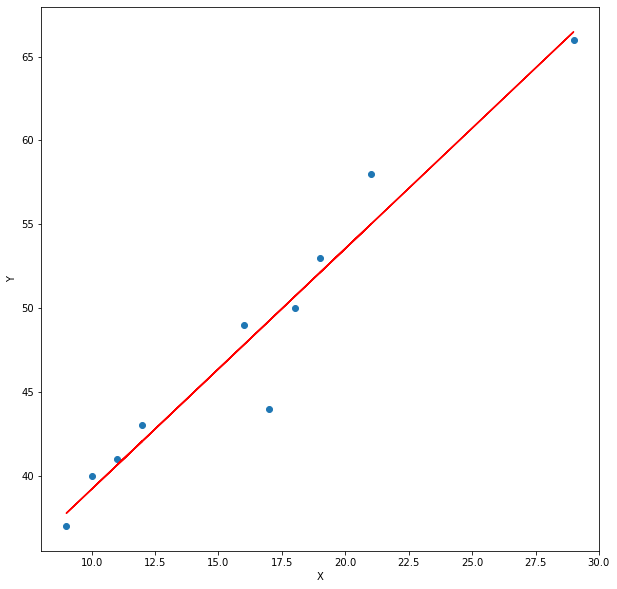

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(x='X',y='Y',data = df)
x = df['X']
y = df['ynew']
plt.plot(x,y,color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Training using train_test_split function with test_size = 20%

In [11]:
X1 = df[['X']]
Y1 = df[['Y']]
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y1,test_size=0.2)
lr = LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_train,Y_train)

0.9422939166850343

# Using the predict function without using the linear equation

In [12]:
Ynew1 = lr.predict(df[['X']])
Ynew1

array([[39.0625    ],
       [41.96634615],
       [37.61057692],
       [47.77403846],
       [50.67788462],
       [55.03365385],
       [40.51442308],
       [49.22596154],
       [66.64903846],
       [52.12980769]])

# The below graph of linear regression is made with the training data obtained by train_test_split function


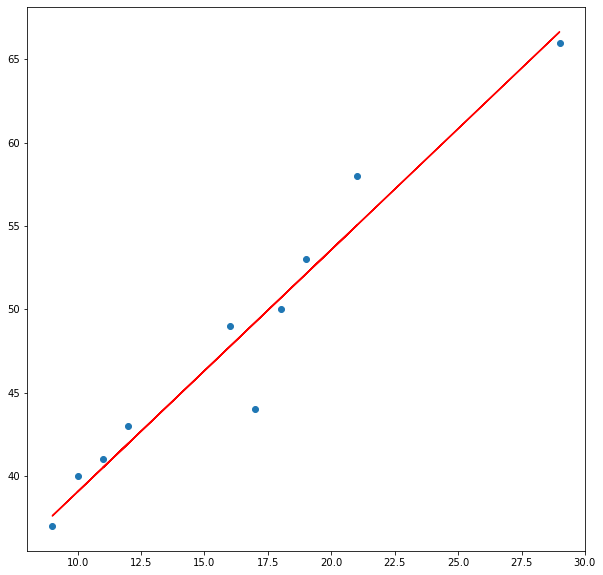

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(x='X',y='Y',data=df)
x=df['X']
plt.plot(x,Ynew1,color='red')
plt.show()

In [14]:
error = df[['Y']]-Ynew1
error

,Y
0,0.937500
1,1.033654
2,-0.610577
3,1.225962
4,-0.677885
5,2.966346
6,0.485577
7,-5.225962
8,-0.649038
9,0.870192


In [15]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

# SLR ERROR INCLUDE MSE,RMSE,MAR

In [16]:
print("THE MEAN SQUARED ERROR MSE IS",mean_squared_error(df['Y'],yhat))

THE MEAN SQUARED ERROR MSE IS 4.170143884892089


In [17]:
print("THE MEAN ABSOLUTE ERROR IS",mean_absolute_error(df['Y'],yhat))

THE MEAN ABSOLUTE ERROR IS 1.4338129496402885


In [18]:
print("THE ROOT MEAN SQUARED ERROR IS",mean_squared_error(df['Y'],yhat,squared=False))

THE ROOT MEAN SQUARED ERROR IS 2.0420930157297166


In [19]:
#MLR table with tejasvee 

# b)Student Marks dataset

# Generating Marks and Grades with random function

In [20]:
import random as r
l1 = []
l2 = []
for i in range(20):
    l1.append(r.randint(0,50))
    l2.append(r.randint(0,10))
marks = {"Marks":l1,"Grades":l2}
data1 = pd.DataFrame(marks)
data1

,Marks,Grades
0,44,4
1,11,9
2,17,5
3,21,6
4,39,8
5,47,6
6,47,3
7,44,0
8,23,6
9,8,9


# Fitting the model with the variables and generating the R^2 values

In [21]:
x = data1[['Marks']]
y = data1[['Grades']]
lr1 = LinearRegression()
lr1.fit(x,y)
lr1.score(x,y)

0.38174114140459103

# coefficient and intercept calculation

In [22]:
m = lr1.coef_
m

array([[-0.1185617]])

In [23]:
c = lr1.intercept_
c

array([8.60607356])

# Predicting Y/grades based on marks input by using the formula y = mx+c

In [24]:
data1['Ypred'] = m*data1[['Marks']]+c
ynew = m*data1[['Marks']]+c
data1

,Marks,Grades,Ypred
0,44,4,3.389359
1,11,9,7.301895
2,17,5,6.590525
3,21,6,6.116278
4,39,8,3.982167
5,47,6,3.033674
6,47,3,3.033674
7,44,0,3.389359
8,23,6,5.879154
9,8,9,7.657580


In [26]:
print("THE MEAN SQUARED ERROR MSE IS",mean_squared_error(data1['Grades'],data1['Ypred']))

THE MEAN SQUARED ERROR MSE IS 5.457680074250973


In [27]:
print("THE MEAN ABSOLUTE ERROR IS",mean_absolute_error(data1['Grades'],data1['Ypred']))

THE MEAN ABSOLUTE ERROR IS 1.7997862155989615


In [28]:
print("THE ROOT MEAN SQUARED ERROR IS",mean_squared_error(data1['Grades'],data1['Ypred'],squared=False))

THE ROOT MEAN SQUARED ERROR IS 2.3361678180839176


# Regression plot

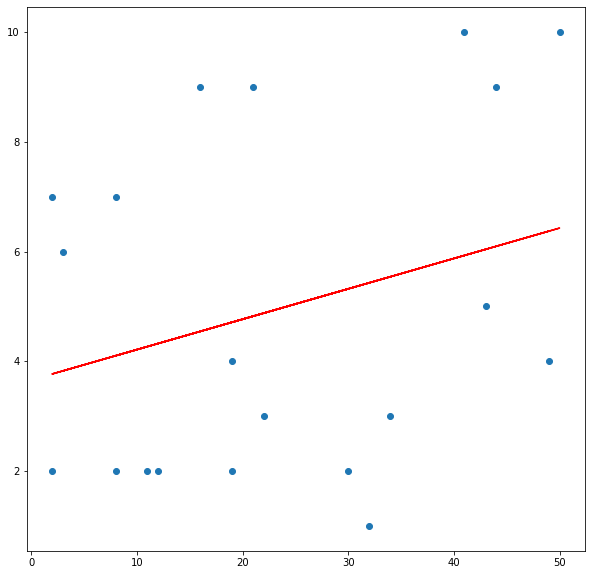

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(x,y)
a = data1['Marks']
b = data1['Ypred']
plt.plot(a,b,color='red')
plt.show()

# Linear regression using train_test_split

In [25]:
X_train, X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.4)
X_train

,Marks
10,8
6,44
17,19
18,21
16,34
2,19
8,16
13,43
3,41
1,30


In [26]:
lr2 = LinearRegression()
lr2.fit(X_train,Y_train)
lr2.score(X_train,Y_train)

0.014525567658500771

In [27]:
ynew1 = lr2.predict(data1[['Marks']])
ynew1

array([[5.12583214],
       [5.56989949],
       [5.298525  ],
       [5.84127399],
       [6.03863725],
       [4.90379846],
       [5.91528521],
       [6.06330766],
       [5.22451377],
       [5.37253622],
       [5.0271505 ],
       [5.10116173],
       [4.87912805],
       [5.8906148 ],
       [5.61924031],
       [5.0271505 ],
       [5.66858113],
       [5.298525  ],
       [5.34786581],
       [4.87912805]])

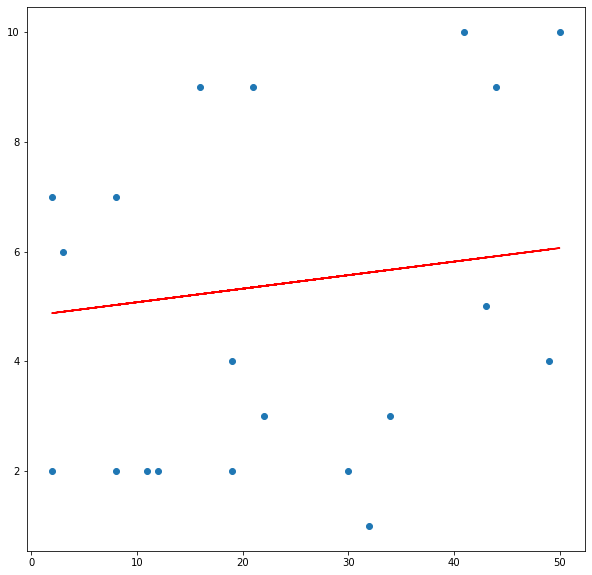

In [28]:
plt.figure(figsize=(10,10))
plt.plot(data1['Marks'],ynew1,color='red')
plt.scatter(x,y)
plt.show()

# Prediction of grade by inputting a new value

In [29]:
lr2.predict([[35]])

C:\Users\jarvi\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[5.69325153]])

In [30]:
lr2.predict(X_test)

array([[4.87912805],
       [5.12583214],
       [4.90379846],
       [5.37253622],
       [6.06330766],
       [5.10116173],
       [5.0271505 ],
       [5.61924031]])

# SLR ERRORS

In [31]:
print("THE MEAN SQUARED ERROR MSE IS",mean_squared_error(data1['Grades'],ynew1))

print("THE MEAN ABSOLUTE ERROR IS",mean_absolute_error(data1['Grades'],ynew1))

print("THE ROOT MEAN SQUARED ERROR IS",mean_squared_error(data1['Grades'],ynew1,squared=False))

THE MEAN SQUARED ERROR MSE IS 9.034041093851638
THE MEAN ABSOLUTE ERROR IS 2.834375407910194
THE ROOT MEAN SQUARED ERROR IS 3.005668160967148


# MLR

In [30]:
import random as r
l1 = []
l2 = []
l3 = []
l4 = []
for i in range(20):
    l1.append(r.randint(0,50))
    l2.append(r.randint(0,50))
    l3.append(r.randint(0,50))
    l4.append(r.randint(0,10))
marks = {"Subject1":l1,"Subject2":l2,"Subject3":l3,"Grade":l4}
data2 = pd.DataFrame(marks)
data2

,Subject1,Subject2,Subject3,Grade
0,17,25,19,9
1,23,32,10,3
2,12,9,28,7
3,33,42,44,2
4,33,42,34,0
5,39,39,48,2
6,16,16,45,5
7,38,8,17,4
8,49,3,38,7
9,18,29,27,5


In [31]:
x = np.array(data2[['Subject1','Subject2','Subject3']])
y = data2['Grade']

# Fitting the model with R^2 value

In [32]:
lr4 = LinearRegression()
lr4.fit(x,y)
lr4.score(x,y)

0.38885804199557417

# The coefficients of MLR are

In [33]:
print(lr4.coef_[0],lr4.coef_[1],lr4.coef_[2])

0.028679329153160276 -0.09231284448585256 -0.07346185948442442


# Intercept of MLR

In [34]:
c = lr4.intercept_
c

7.7058497927207386

In [35]:
data2['pred'] = data2['Subject1']*lr4.coef_[0]+data2['Subject2']*lr4.coef_[1]+data2['Subject3']*lr4.coef_[2]+c
data2

,Subject1,Subject2,Subject3,Grade,pred
0,17,25,19,9,4.489802
1,23,32,10,3,4.676845
2,12,9,28,7,5.162254
3,33,42,44,2,1.542806
4,33,42,34,0,2.277425
5,39,39,48,2,1.697973
6,16,16,45,5,3.381930
7,38,8,17,4,6.808310
8,49,3,38,7,6.042648
9,18,29,27,5,3.561535


# Regplot

C:\Users\jarvi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


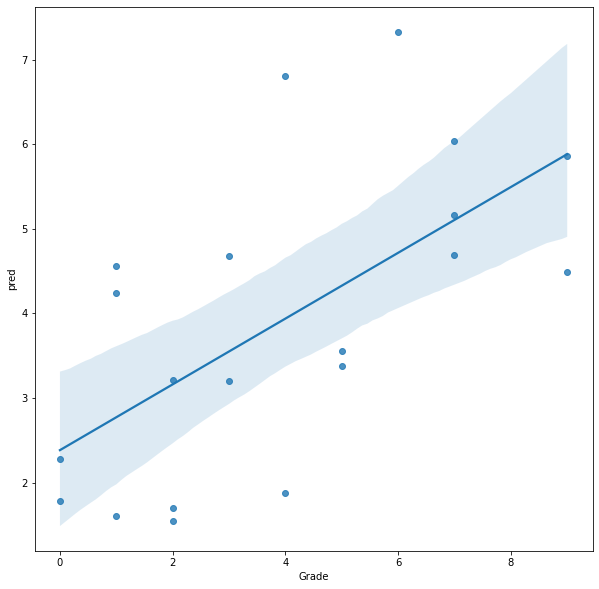

In [36]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.regplot(data2['Grade'],data2['pred'])
plt.show()

# Splitting the dataset into training and testing set


In [37]:
x = data2.iloc[:,:3]
y = data2['Grade']
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3)
X_train

,Subject1,Subject2,Subject3
18,10,49,23
11,1,25,10
5,39,39,48
6,16,16,45
15,39,41,43
1,23,32,10
14,24,45,14
10,41,43,45
16,21,17,34
13,4,13,28


In [38]:
lr4 = LinearRegression()
lr4.fit(X_train,Y_train)
c = lr4.intercept_
c

6.946931240954769

In [39]:
lr4.coef_[:]

array([ 0.04423546, -0.06071323, -0.09277901])

# Prediction of values based on X-training values

In [40]:
ypred_train = lr4.predict(X_train)
ypred_train

array([2.28042038, 4.54554586, 1.85090578, 2.50823142, 2.19337438,
       5.09373345, 3.97758089, 1.97486083, 3.68926465, 3.73678877,
       3.47745261, 6.68860903, 6.56492979, 4.41830216])

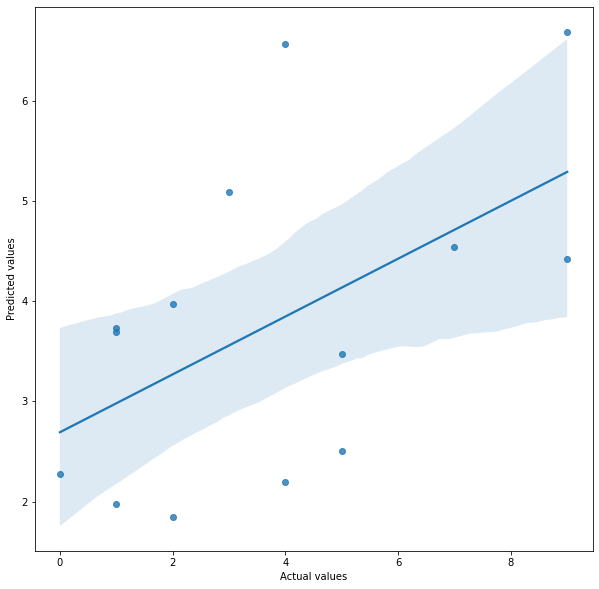

In [41]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.regplot(x = Y_train,y = ypred_train)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

# Predicting Grade value with a new input

In [42]:
lr4.predict([[23,30,45]])

C:\Users\jarvi\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.96789446])

In [44]:
print("THE MEAN ABSOLUTE ERROR IS",mean_absolute_error(data2['Grade'],data2['pred']))

THE MEAN ABSOLUTE ERROR IS 1.8691327897969932


In [45]:
print("THE ROOT MEAN SQUARED ERROR IS",mean_squared_error(data2['Grade'],data2['pred'],squared=False))

THE ROOT MEAN SQUARED ERROR IS 2.18192480458298


In [46]:
print("THE MEAN SQUARED ERROR MSE IS",mean_squared_error(data2['Grade'],data2['pred']))

THE MEAN SQUARED ERROR MSE IS 4.760795852854477


# Traveling Dataset

In [49]:
data={"SNO":[1,2,3,4,5,6,7,8,9,10],
      "Miles Traveled":[89,66,78,111,44,77,80,66,109,76],
      "Num deliveries":[4,1,3,6,1,3,3,3,5,3],
      "Travel time":[7,5.4,6.6,7.4,4.8,6.4,6.7,5.6,7.3,6.4]}
df = pd.DataFrame(data)
df

,SNO,Miles Traveled,Num deliveries,Travel time
0,1,89,4,7.0
1,2,66,1,5.4
2,3,78,3,6.6
3,4,111,6,7.4
4,5,44,1,4.8
5,6,77,3,6.4
6,7,80,3,6.7
7,8,66,3,5.6
8,9,109,5,7.3
9,10,76,3,6.4


# Fitting the model with the direct dataset values and calculating R^2 values

In [50]:
lr5 = LinearRegression()
a1 = df[['Miles Traveled','Num deliveries']]
b1 = df['Travel time']
lr5.fit(a1,b1)
lr5.score(a1,b1)

0.8999508500616292

# Coefficients

In [51]:
m = lr5.coef_[0]
m

0.035126895187870814

In [52]:
m1 = lr5.coef_[1]
m1

0.07031970995385597

# Intercept

In [53]:
c = lr5.intercept_

# Regplot

In [54]:
df['PREDICTED'] = c + df['Miles Traveled']*m+df['Num deliveries']*m1
df

,SNO,Miles Traveled,Num deliveries,Travel time,PREDICTED
0,1,89,4,7.0,6.746449
1,2,66,1,5.4,5.727571
2,3,78,3,6.6,6.289733
3,4,111,6,7.4,7.659880
4,5,44,1,4.8,4.954779
5,6,77,3,6.4,6.254606
6,7,80,3,6.7,6.359987
7,8,66,3,5.6,5.868210
8,9,109,5,7.3,7.519306
9,10,76,3,6.4,6.219479


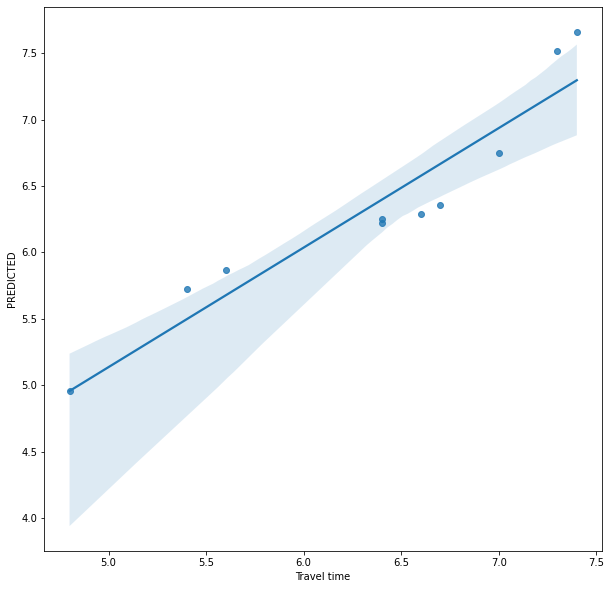

In [57]:
plt.figure(figsize=(10,10))
sns.regplot(x='Travel time',y = 'PREDICTED',data=df)
plt.show()

In [58]:
x_train,x_test,y_train,y_test = train_test_split(a1,b1,test_size = 0.2)
lr6 = LinearRegression()
lr6.fit(x_train,y_train)
lr6.score(x_train,y_train)

0.9037740507847387

# Coefficients using the train_test_function

In [59]:
lr6.coef_

array([0.03050744, 0.14652759])

# Intercept using the train_test_function

In [60]:
lr6.intercept_

3.529776990758675

# Predicting values with predict function

In [61]:
yhat = lr6.predict(a1)

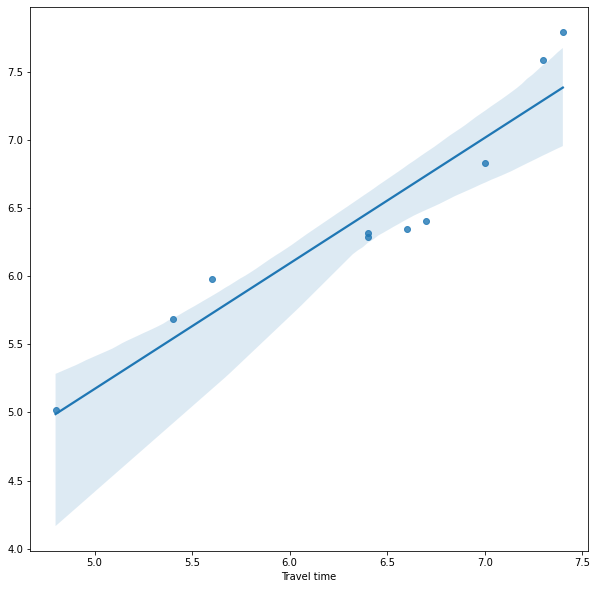

In [62]:
plt.figure(figsize=(10,10))
sns.regplot(x=b1,y=yhat)
plt.show()

In [64]:
print("THE MEAN ABSOLUTE ERROR IS",mean_absolute_error(df['Travel time'],df['PREDICTED']))

THE MEAN ABSOLUTE ERROR IS 0.24594924192485176


In [65]:
print("THE ROOT MEAN SQUARED ERROR IS",mean_squared_error(df['Travel time'],df['PREDICTED'],squared=False))

THE ROOT MEAN SQUARED ERROR IS 0.254699565802613


In [66]:
print("THE MEAN SQUARED ERROR MSE IS",mean_squared_error(df['Travel time'],df['PREDICTED']))

THE MEAN SQUARED ERROR MSE IS 0.06487186882003959
